# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
heroes_df.shape

# There were originally 11 columns, but I dropped "Unnamed: 0" (See below), leaving only 10.

(734, 11)

In [6]:
powers_df.shape

# That's a lot of columns!

(667, 168)

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [7]:
heroes_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [9]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [10]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [11]:
heroes_df.describe()

# Looks like the min values (-99) for Height and Weight are dramatically dragging down their respective means.
# I can tell because the mean is so much lower than the median.
# Let's try to visualize this with a histogram. See below.

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [12]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Black Adam,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1823ee10>,
      dtype=object)

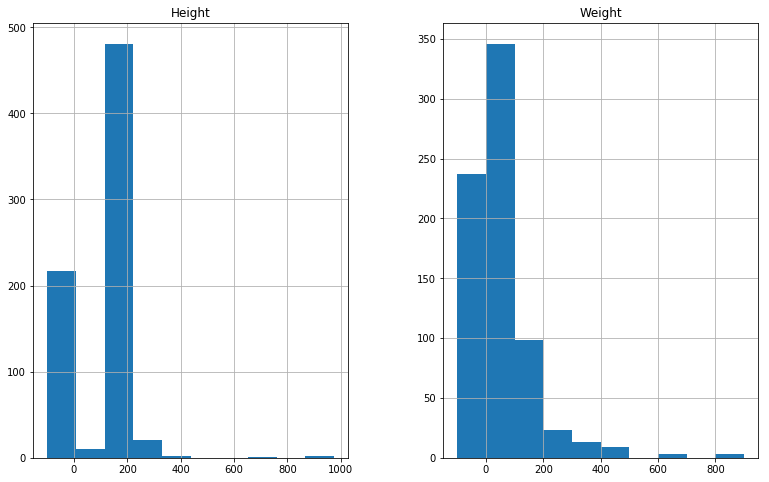

In [13]:
heroes_df.hist(figsize = (13,8))

# A huge share of Height and Weight values are below 0. That's alarming.

In [14]:
heroes_df[heroes_df["Height"] == -99].head()

# Looks like when Height is at -99, the corresponding Weight value also tends to be -99.
# This suggests these values are mere placeholders.

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0


In [15]:
heroes_df[heroes_df["Height"] == -99]["Weight"].value_counts()

# Yup. When the Height value is -99, the corresponding Weight value is -99 212 times.

-99.0     212
 149.0      1
 198.0      1
 176.0      1
 2.0        1
 72.0       1
Name: Weight, dtype: int64

In [16]:
heroes_df[heroes_df["Height"] == -99]["Weight"].value_counts(normalize = True)

# That means when the Height value is -99, the corresponding Weight value is is -99 97.7% part of the time!

-99.0     0.976959
 149.0    0.004608
 198.0    0.004608
 176.0    0.004608
 2.0      0.004608
 72.0     0.004608
Name: Weight, dtype: float64

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [17]:
heroes_df.isna().sum()

# .isna and .isnull accomplish the same thing.

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [18]:
# I can also grab the percentage of null values:

heroes_df.isna().sum() / len(heroes_df.index)

name          0.000000
Gender        0.000000
Eye color     0.000000
Race          0.000000
Hair color    0.000000
Height        0.000000
Publisher     0.020436
Skin color    0.000000
Alignment     0.000000
Weight        0.002725
dtype: float64

In [19]:
# Better yet, for a truer percentage value, I ought to include all those -99s among my null values:

heroes_df['Height'].replace(-99, np.nan, inplace = True)

In [20]:
# Do the same thing with Weight:

heroes_df['Weight'].replace(-99, np.nan, inplace = True)

In [21]:
# Now let's see those updated percentages of the null values in each heroes feature.
# Notice that we see significant increases in Height and Weight.

heroes_df.isna().sum() / len(heroes_df.index)

name          0.000000
Gender        0.000000
Eye color     0.000000
Race          0.000000
Hair color    0.000000
Height        0.295640
Publisher     0.020436
Skin color    0.000000
Alignment     0.000000
Weight        0.325613
dtype: float64

In [22]:
# And of course, the total number of null values in Height and Weight increased precipitously.

heroes_df.isna().sum()

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height        217
Publisher      15
Skin color      0
Alignment       0
Weight        239
dtype: int64

In [23]:
# Why not recheck our null values in the powers dataframe:

powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [24]:
# To deal with these null values in Height and Weight, let's replace them with the median value.

heroes_df['Height'].fillna(heroes_df['Height'].median(), inplace = True)
heroes_df.isna().sum()

# See the changes in our isna.sum data:

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height          0
Publisher      15
Skin color      0
Alignment       0
Weight        239
dtype: int64

In [25]:
# Now the same for Weight:

heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace = True)
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [26]:
# Now the only null values are those in the Publisher column.
# It's such a small amount, we ought to just drop those values.

heroes_df.dropna(inplace = True)
heroes_df.isna().sum()

# And now we don't have any more missing data!

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [69]:
joined_df = pd.merge(heroes_df, powers_df, left_on = 'name', right_on = 'hero_names', how = 'inner')
joined_df.head()

# Why did I need to use merge instead of join?

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,183.0,Marvel Comics,-,bad,81.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [28]:
male_heroes = joined_df[joined_df['Gender'] == 'Male']

In [29]:
female_heroes = joined_df[joined_df['Gender'] == 'Female']

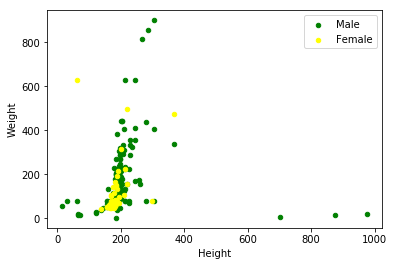

In [30]:
ax1 = plt.subplot(1, 1, 1)

male_heroes.plot(kind = 'scatter', x = 'Height', y = 'Weight', color = 'green', ax = ax1, label = 'Male')
female_heroes.plot(kind = 'scatter', x = 'Height', y = 'Weight', color = 'yellow', ax = ax1, label = 'Female')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [31]:
male_heroes_df = None
female_heroes_df = None

# I already sliced the dataframe by gender, so no need to do it again in the lines above.

def show_distplot(dataframe, gender, column_name):
    df_by_gender = dataframe[dataframe['Gender'] == gender]
    sns.distplot(df_by_gender[column_name])
    plt.title(gender + ' ' + column_name)
    plt.show()

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


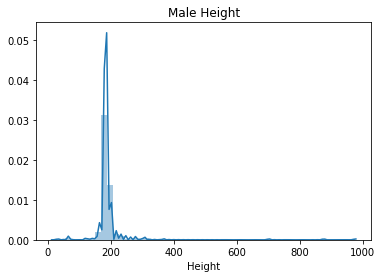

In [32]:
# Male Height

show_distplot(joined_df, 'Male', 'Height')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


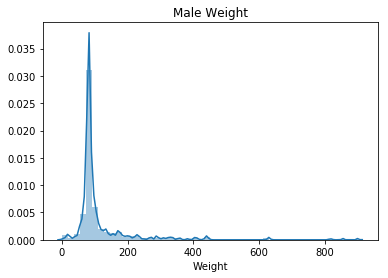

In [33]:
# Male Weight

show_distplot(joined_df, 'Male', 'Weight')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


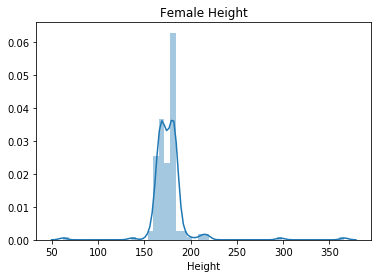

In [34]:
# Female Height

show_distplot(joined_df, 'Female', 'Height')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


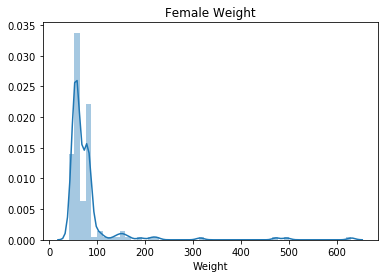

In [35]:
# Female Weight

show_distplot(joined_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



In [36]:
# Save for but a small sample of outliers, the Weight and Height values of male and female superheroes are
# clustered fairly close together, respectively, seen in the extremely high peaks in the above plots.
# It seems there isn't much variety among superhero bodytypes.

# On average, male superheroes are both heavier and taller than female superheroes. This is true
# both in terms of mean and median.

# Among male superheroes, the mean values for Height and Weight are greater than the median values for
# those respective features. This is most likely due to their being at least one instance of an extreme outlier.
# Indeed, the max value for Male-Weight is 900 (113.57 mean), and the max Male-Height is 975 (190.54 mean).
# For this reason, the median would be a more reliable measure of central tendency than the mean.

# Outliers also skew the mean value for female Weight, as the mean is about 19 units higher than the median.
# This is hardly the case when examining female Height, as the mean and median are generally in
# line with one another.

In [37]:
male_heroes.describe()

,Height,Weight
count,454.000000,454.000000
mean,190.538546,113.568282
std,60.498749,97.506952
min,15.200000,2.000000
25%,183.000000,81.000000
50%,183.000000,81.000000
75%,188.000000,101.000000
max,975.000000,900.000000


In [38]:
female_heroes.describe()

,Height,Weight
count,176.000000,176.000000
mean,176.576705,80.125000
std,21.678523,68.971847
min,62.500000,41.000000
25%,168.000000,54.000000
50%,175.000000,61.000000
75%,183.000000,81.000000
max,366.000000,630.000000


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [39]:
# There are well over 100 columns in our DataFrame, with most of them assigned to a particular superpower.
# For example, notice below that there are 14 superheroes with Reality Warping power.
# But it'd be super impractical (pun intended) to go through each of these columns by name and grab the sum.
# So here's what we'll do instead: Notice that these columns are all boolean:

print(joined_df['Reality Warping'].sum())
print(joined_df['Reality Warping'].dtype)

14
bool


In [40]:
# Let's take the sum of each column whenever the column is a bool dtype.

for col in joined_df.columns:
    if joined_df[col].dtype == bool:
        print(col + ' ' + str(joined_df[col].sum()))

Agility 236
Accelerated Healing 181
Lantern Power Ring 11
Dimensional Awareness 25
Cold Resistance 49
Durability 256
Stealth 126
Energy Absorption 76
Flight 211
Danger Sense 33
Underwater breathing 23
Marksmanship 119
Weapons Master 103
Power Augmentation 8
Animal Attributes 26
Longevity 114
Intelligence 156
Super Strength 357
Cryokinesis 20
Telepathy 92
Energy Armor 8
Energy Blasts 146
Duplication 17
Size Changing 55
Density Control 15
Stamina 286
Astral Travel 4
Audio Control 8
Dexterity 6
Omnitrix 1
Super Speed 248
Possession 7
Animal Oriented Powers 41
Weapon-based Powers 60
Electrokinesis 20
Darkforce Manipulation 9
Death Touch 7
Teleportation 70
Enhanced Senses 91
Telekinesis 61
Energy Beams 41
Magic 44
Hyperkinesis 1
Jump 64
Clairvoyance 5
Dimensional Travel 23
Power Sense 3
Shapeshifting 65
Peak Human Condition 30
Immortality 68
Camouflage 22
Element Control 9
Phasing 32
Astral Projection 29
Electrical Transport 1
Fire Control 32
Projection 2
Summoning 4
Enhanced Memory 27
Refl

In [41]:
# From here, it's tempting to just eyeball our way to a Top 5.
# But let's let the computer do our work for us by putting this info into a dict.
# Let's revise our for loop above to do this for us.

count_dict = {}
for col in joined_df.columns:
    if joined_df[col].dtype == bool:
        count_dict[col] = joined_df[col].sum()

In [42]:
count_dict

{'Agility': 236,
 'Accelerated Healing': 181,
 'Lantern Power Ring': 11,
 'Dimensional Awareness': 25,
 'Cold Resistance': 49,
 'Durability': 256,
 'Stealth': 126,
 'Energy Absorption': 76,
 'Flight': 211,
 'Danger Sense': 33,
 'Underwater breathing': 23,
 'Marksmanship': 119,
 'Weapons Master': 103,
 'Power Augmentation': 8,
 'Animal Attributes': 26,
 'Longevity': 114,
 'Intelligence': 156,
 'Super Strength': 357,
 'Cryokinesis': 20,
 'Telepathy': 92,
 'Energy Armor': 8,
 'Energy Blasts': 146,
 'Duplication': 17,
 'Size Changing': 55,
 'Density Control': 15,
 'Stamina': 286,
 'Astral Travel': 4,
 'Audio Control': 8,
 'Dexterity': 6,
 'Omnitrix': 1,
 'Super Speed': 248,
 'Possession': 7,
 'Animal Oriented Powers': 41,
 'Weapon-based Powers': 60,
 'Electrokinesis': 20,
 'Darkforce Manipulation': 9,
 'Death Touch': 7,
 'Teleportation': 70,
 'Enhanced Senses': 91,
 'Telekinesis': 61,
 'Energy Beams': 41,
 'Magic': 44,
 'Hyperkinesis': 1,
 'Jump': 64,
 'Clairvoyance': 5,
 'Dimensional Trav

In [43]:
# We have our dictionary, but let's turn it into a dataframe. They're easier to work with.
# Plus, we're eventually going to be plotting this stuff.

count_df = pd.DataFrame(count_dict, index = ['Counts'])

# The index specification above is necessary because pandas throws an error message
# whenever you're trying to make a df with only one row. It might just be a bug within pandas.

In [44]:
count_df

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Counts,236,181,11,25,49,256,126,76,211,33,...,16,14,2,10,1,1,1,1,2,2


In [45]:
# We ought to transpose our counts_df, because that will make it easier to sort by count.
# While we're at it, let's redefine our df to be the transposed version:

count_df = count_df.T

In [46]:
count_df.head()

,Counts
Agility,236
Accelerated Healing,181
Lantern Power Ring,11
Dimensional Awareness,25
Cold Resistance,49


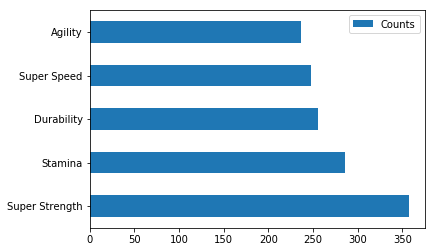

In [47]:
# Now let's sort it in descending order, looking only at the top 5.
# And I'll plot this while I'm at it.

count_df.sort_values("Counts", ascending = False).head().plot(kind="barh")

# The superpowers that are most common are, in order: Super Strength, Stamina, Durability, Super Speed, Agility.

In [48]:
# Here I'm making seperate dataframes for DC and Marvel:

marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']

In [49]:
# As before, let's put this data into dict form, then a dataframe.

marvel_dict = {}
for col in marvel_df.columns:
    if marvel_df[col].dtype == bool:
        marvel_dict[col] = marvel_df[col].sum()

dc_dict = {}
for col in dc_df.columns:
    if dc_df[col].dtype == bool:
        dc_dict[col] = dc_df[col].sum()

In [50]:
# Now I'm gonna turn these dicts into transposed dataframes:
# check out and visualize the top 5 superheroes in each of these universes.

marvel_df_counts = pd.DataFrame(marvel_dict, index = ['Counts'])
dc_df_counts = pd.DataFrame(dc_dict, index = ['Counts'])

marvel_df_counts = marvel_df_counts.T
dc_df_counts = dc_df_counts.T

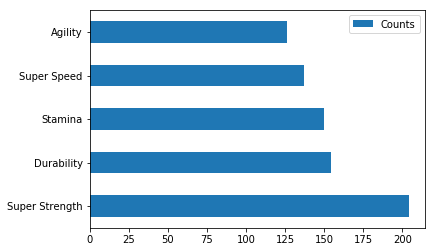

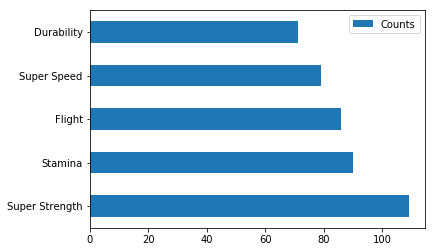

In [51]:
# Time to make a visualization of the top 5 superheroes in each of these universes.

marvel_df_counts.sort_values('Counts', ascending = False).head().plot(kind = 'barh')
dc_df_counts.sort_values('Counts', ascending = False).head().plot(kind = 'barh')

Text(0.5, 1.0, 'DC')

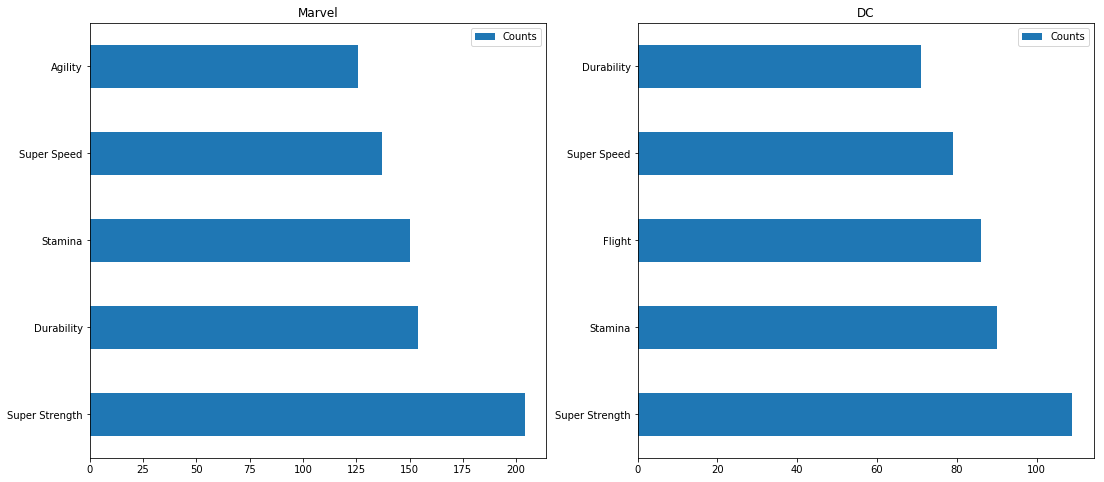

In [52]:
# I'll make a subplot to put these together:

ax1 = plt.subplot(1,2,1)
marvel_df_counts.sort_values('Counts', ascending = False).head().plot(kind = 'barh', ax = ax1, figsize = (13,8))
plt.title('Marvel')

ax2 = plt.subplot(1,2,2)
dc_df_counts.sort_values('Counts', ascending = False).head().plot(kind = 'barh', ax = ax2, figsize = (18,8))
plt.title('DC')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

*Both Marvel and DC can claim "Super Strength" as their single most popular superpower. Stamina and Super Speed are also top-5 superpowers in both universes.*

*All of these superpowers, with the exception of Agility, appear in the top-5 superpowers overall, perhaps indicitive of DC and Marvel's leadership in the superhero market.*


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

*There are only seven superheroes belonging to the Alien race. Among those, three of them have unspecified skin color. The other four each have a unique skin color, strongly suggesting that there is no correlation between being Alien and having a certain skin color.*

*It is worth noting that the three superheroes with unspecificied skin color may have the ability to change their skin color, which could in itself be valuable data. If this is the case, then having this "cameleon-like" ability would be the most common skin color among aliens.*

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [109]:
aliens_df = joined_df[joined_df['Race'] == 'Alien']
aliens_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
39,Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0,...,False,False,False,False,False,False,False,False,False,False
100,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,-,-,88.0,...,False,False,False,False,False,False,False,False,False,False
147,Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0,...,False,False,False,False,False,False,False,False,False,False
201,Doomsday,Male,red,Alien,White,244.0,DC Comics,-,bad,412.0,...,False,False,False,False,False,False,False,False,False,False
217,Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0,...,False,False,False,False,False,False,False,False,False,False
297,Indigo,Female,-,Alien,Purple,183.0,DC Comics,-,neutral,81.0,...,False,False,False,False,False,False,False,False,False,False
529,Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0,...,False,False,False,False,False,False,False,False,False,False


In [110]:
alienskin_df = aliens_df.groupby(['Race', 'Skin color']).size().unstack(fill_value=0)

Text(0.5, 1.0, 'Alien Skin Colors')

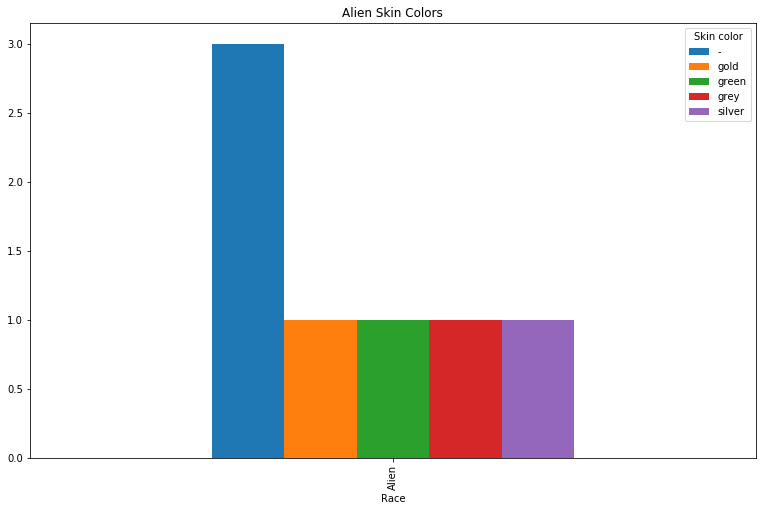

In [111]:
alienskin_df.plot.bar(figsize=(13,8))
plt.title("Alien Skin Colors")

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data